<a href="https://colab.research.google.com/github/bakkourysalma/DS_2025/blob/main/BAKKOURY_SALMA___ANALYSE_(_E_commerce_Customer_Behavior_(DEEP_ANALYSIS)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install and upgrade kagglehub to ensure access to the latest functions
!pip install --upgrade kagglehub

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Define the dataset handle
dataset_handle = "umuttuygurr/e-commerce-customer-behavior-and-sales-analysis-tr"

# ATTENTION: The 'dataset_files' function is not available in the current kagglehub version (0.3.13).
# Please visit the Kaggle dataset page (https://www.kaggle.com/datasets/umuttuygurr/e-commerce-customer-behavior-and-sales-analysis-tr)
# to find the correct file name and update the 'file_path' variable below.

# Set the path to the file you'd like to load.
# Replace "your_file_name.csv" with the actual file name from the Kaggle dataset.
file_path = "ecommerce_customer_behavior_dataset.csv"  # Updated with the correct file name

# Load the dataset using the specified file_path
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  dataset_handle,
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documentation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-2343617937.py:19: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'e-commerce-customer-behavior-and-sales-analysis-tr' dataset.
First 5 records:      Order_ID Customer_ID        Date  Age  Gender      City Product_Category  \
0  ORD_001337  CUST_01337  2023-01-01   27  Female     Bursa             Toys   
1  ORD_004885  CUST_04885  2023-01-01   42    Male     Konya             Toys   
2  ORD_004507  CUST_04507  2023-01-01   43  Female    Ankara             Food   
3  ORD_000645  CUST_00645  2023-01-01   32    Male  Istanbul      Electronics   
4  ORD_000690  CUST_00690  2023-01-01   40  Female  Istanbul           Sports   

   Unit_Price  Quantity  Discount_Amount  Total_Amount    Payment_Method  \
0       54.28         1             0.00         54.28        Debit Card   
1      244.90         1             0.00        244.90       Credit Card   
2       48.15         5             0.00        240.75       Credit Card   
3      804.06         1           229.28        574.78       Credit Card   
4      755.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Enhanced styling
sns.set_style('whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

print("✅ Libraries loaded successfully!")
print("🎨 Enhanced visualizations enabled!")

✅ Libraries loaded successfully!
🎨 Enhanced visualizations enabled!


In [3]:
# Load dataset
df = pd.read_csv('/kaggle/input/e-commerce-customer-behavior-and-sales-analysis-tr/ecommerce_customer_behavior_dataset.csv')

print(f"📦 Dataset loaded successfully!")
print(f"📊 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"📅 Date Range: {df['Date'].min()} → {df['Date'].max()}")
print(f"\n{'='*70}\n")

df.head(10)

📦 Dataset loaded successfully!
📊 Shape: 5,000 rows × 18 columns
📅 Date Range: 2023-01-01 → 2024-03-26




,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4
5,ORD_000223,CUST_00223,2023-01-01,43,Female,Istanbul,Beauty,122.46,1,0.00,122.46,Credit Card,Mobile,14,9,True,9,5
6,ORD_002506,CUST_02506,2023-01-01,25,Female,Izmir,Electronics,2107.37,2,0.00,4214.74,Digital Wallet,Desktop,10,5,False,6,5
7,ORD_004540,CUST_04540,2023-01-01,44,Male,Konya,Food,213.64,2,0.00,427.28,Credit Card,Mobile,10,16,False,3,5
8,ORD_001808,CUST_01808,2023-01-02,41,Male,Istanbul,Fashion,257.62,5,62.15,1225.95,Credit Card,Tablet,24,7,False,2,4
9,ORD_003413,CUST_03413,2023-01-02,58,Male,Istanbul,Sports,1784.75,4,490.25,6648.75,Debit Card,Desktop,8,5,True,5,4


In [4]:
print("🔍 DATA QUALITY ASSESSMENT")
print("="*70)

# Basic info
print("\n📋 Dataset Information:")
df.info()

print("\n" + "="*70)
print("❌ Missing Values Check:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ No missing values found! Dataset is clean.")
else:
    print(missing[missing > 0])

print("\n" + "="*70)
print("📊 Statistical Summary:")
df.describe()

🔍 DATA QUALITY ASSESSMENT

📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  5000 non-null   object 
 1   Customer_ID               5000 non-null   object 
 2   Date                      5000 non-null   object 
 3   Age                       5000 non-null   int64  
 4   Gender                    5000 non-null   object 
 5   City                      5000 non-null   object 
 6   Product_Category          5000 non-null   object 
 7   Unit_Price                5000 non-null   float64
 8   Quantity                  5000 non-null   int64  
 9   Discount_Amount           5000 non-null   float64
 10  Total_Amount              5000 non-null   float64
 11  Payment_Method            5000 non-null   object 
 12  Device_Type               5000 non-null   object 
 13  Session_Durat

,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000
mean,35.032600,455.834120,2.220000,24.852804,983.108914,14.57340,8.98420,6.497000,3.902800
std,11.080546,712.477209,1.398711,88.385124,1898.978528,8.66575,2.80434,3.464966,1.128542
min,18.000000,5.180000,1.000000,0.000000,7.870000,1.00000,1.00000,1.000000,1.000000
25%,27.000000,76.587500,1.000000,0.000000,122.517500,8.00000,7.00000,4.000000,3.000000
50%,35.000000,182.950000,2.000000,0.000000,337.910000,13.00000,9.00000,6.000000,4.000000
75%,42.000000,513.930000,3.000000,8.760000,979.695000,19.00000,11.00000,8.000000,5.000000
max,75.000000,7159.450000,5.000000,1525.550000,22023.900000,73.00000,24.00000,25.000000,5.000000


In [5]:
# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Financial features
df['Total_Amount'] = df['Unit_Price'] * df['Quantity']
df['Final_Amount'] = df['Total_Amount'] - df['Discount_Amount']
df['Discount_Percentage'] = (df['Discount_Amount'] / df['Total_Amount'] * 100).fillna(0)

# Time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Day_Name'] = df['Date'].dt.day_name()
df['Quarter'] = df['Date'].dt.quarter
df['Week'] = df['Date'].dt.isocalendar().week

# Age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100],
                          labels=['18-25', '26-35', '36-45', '46-55', '55+'])

# Has discount flag
df['Has_Discount'] = (df['Discount_Amount'] > 0).astype(int)

print("✅ Feature engineering completed!")
print(f"🎯 Total features: {df.shape[1]} columns")
print(f"\n📝 New features created:")
new_features = ['Total_Amount', 'Final_Amount', 'Discount_Percentage', 'Year', 'Month',
                'Month_Name', 'Day', 'DayOfWeek', 'Day_Name', 'Quarter', 'Week',
                'Age_Group', 'Has_Discount']
for feat in new_features:
    print(f"   ✓ {feat}")

✅ Feature engineering completed!
🎯 Total features: 30 columns

📝 New features created:
   ✓ Total_Amount
   ✓ Final_Amount
   ✓ Discount_Percentage
   ✓ Year
   ✓ Month
   ✓ Month_Name
   ✓ Day
   ✓ DayOfWeek
   ✓ Day_Name
   ✓ Quarter
   ✓ Week
   ✓ Age_Group
   ✓ Has_Discount


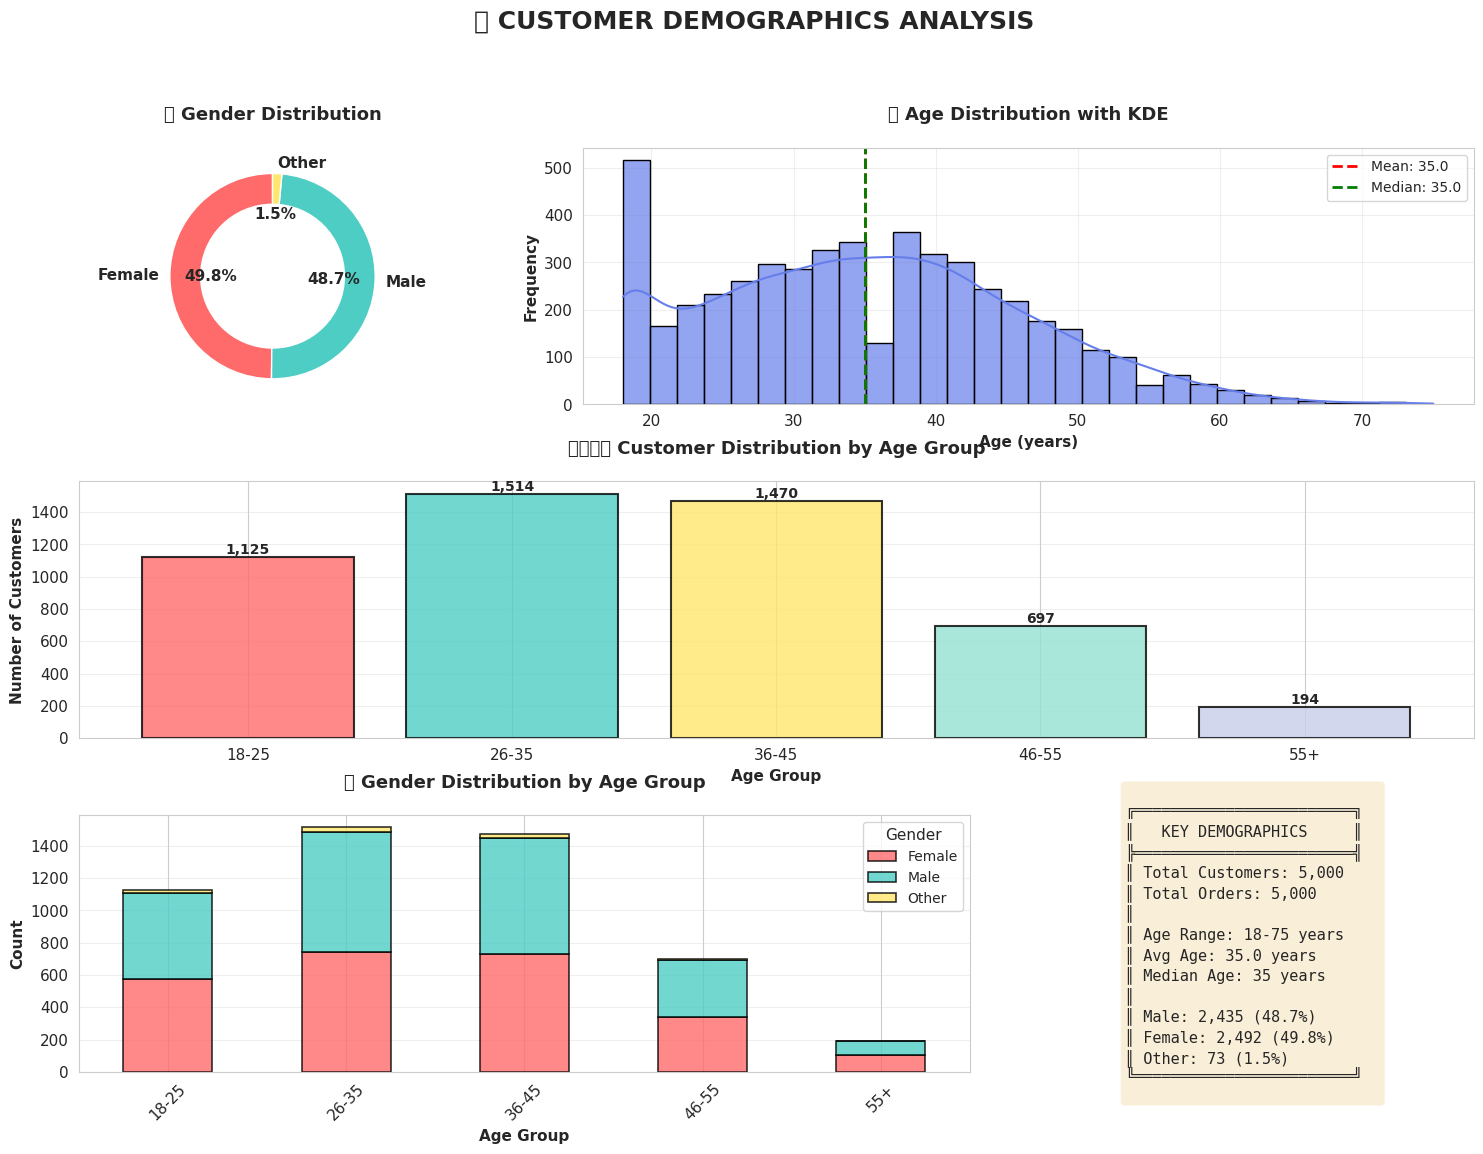

✅ Demographics dashboard generated!


In [6]:
# Create a stunning demographics dashboard
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Gender Distribution - Donut Chart
ax1 = fig.add_subplot(gs[0, 0])
gender_counts = df['Gender'].value_counts()
colors_gender = ['#FF6B6B', '#4ECDC4', '#FFE66D']
wedges, texts, autotexts = ax1.pie(gender_counts.values, labels=gender_counts.index,
                                     autopct='%1.1f%%', startangle=90, colors=colors_gender,
                                     textprops={'fontsize': 11, 'weight': 'bold'})
circle = plt.Circle((0, 0), 0.70, fc='white')
ax1.add_artist(circle)
ax1.set_title('👥 Gender Distribution', fontsize=13, weight='bold', pad=20)

# 2. Age Distribution - Histogram with KDE
ax2 = fig.add_subplot(gs[0, 1:])
sns.histplot(data=df, x='Age', bins=30, kde=True, color='#667eea', ax=ax2, edgecolor='black', alpha=0.7)
ax2.axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Age"].mean():.1f}')
ax2.axvline(df['Age'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["Age"].median():.1f}')
ax2.set_title('📊 Age Distribution with KDE', fontsize=13, weight='bold', pad=20)
ax2.set_xlabel('Age (years)', fontsize=11, weight='bold')
ax2.set_ylabel('Frequency', fontsize=11, weight='bold')
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3)

# 3. Age Group Distribution - Bar Chart
ax3 = fig.add_subplot(gs[1, :])
age_group_counts = df['Age_Group'].value_counts().sort_index()
bars = ax3.bar(age_group_counts.index, age_group_counts.values,
               color=['#FF6B6B', '#4ECDC4', '#FFE66D', '#95E1D3', '#C7CEEA'],
               edgecolor='black', linewidth=1.5, alpha=0.8)
ax3.set_title('👨‍👩‍👧‍👦 Customer Distribution by Age Group', fontsize=13, weight='bold', pad=20)
ax3.set_xlabel('Age Group', fontsize=11, weight='bold')
ax3.set_ylabel('Number of Customers', fontsize=11, weight='bold')
ax3.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=10, weight='bold')

# 4. Gender by Age Group - Stacked Bar
ax4 = fig.add_subplot(gs[2, :2])
gender_age = pd.crosstab(df['Age_Group'], df['Gender'])
gender_age.plot(kind='bar', stacked=True, ax=ax4, color=['#FF6B6B', '#4ECDC4', '#FFE66D'],
                edgecolor='black', linewidth=1.2, alpha=0.8)
ax4.set_title('👥 Gender Distribution by Age Group', fontsize=13, weight='bold', pad=20)
ax4.set_xlabel('Age Group', fontsize=11, weight='bold')
ax4.set_ylabel('Count', fontsize=11, weight='bold')
ax4.legend(title='Gender', fontsize=10, title_fontsize=11)
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)

# 5. Key Stats Box
ax5 = fig.add_subplot(gs[2, 2])
ax5.axis('off')
stats_text = f"""
╔════════════════════════╗
║   KEY DEMOGRAPHICS     ║
╠════════════════════════╣
║ Total Customers: {df['Customer_ID'].nunique():,}
║ Total Orders: {len(df):,}
║
║ Age Range: {df['Age'].min()}-{df['Age'].max()} years
║ Avg Age: {df['Age'].mean():.1f} years
║ Median Age: {df['Age'].median():.0f} years
║
║ Male: {(df['Gender']=='Male').sum():,} ({(df['Gender']=='Male').sum()/len(df)*100:.1f}%)
║ Female: {(df['Gender']=='Female').sum():,} ({(df['Gender']=='Female').sum()/len(df)*100:.1f}%)
║ Other: {(df['Gender']=='Other').sum()} ({(df['Gender']=='Other').sum()/len(df)*100:.1f}%)
╚════════════════════════╝
"""
ax5.text(0.1, 0.5, stats_text, fontsize=11, family='monospace',
         verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('🎯 CUSTOMER DEMOGRAPHICS ANALYSIS', fontsize=18, weight='bold', y=0.995)
plt.show()

print("✅ Demographics dashboard generated!")

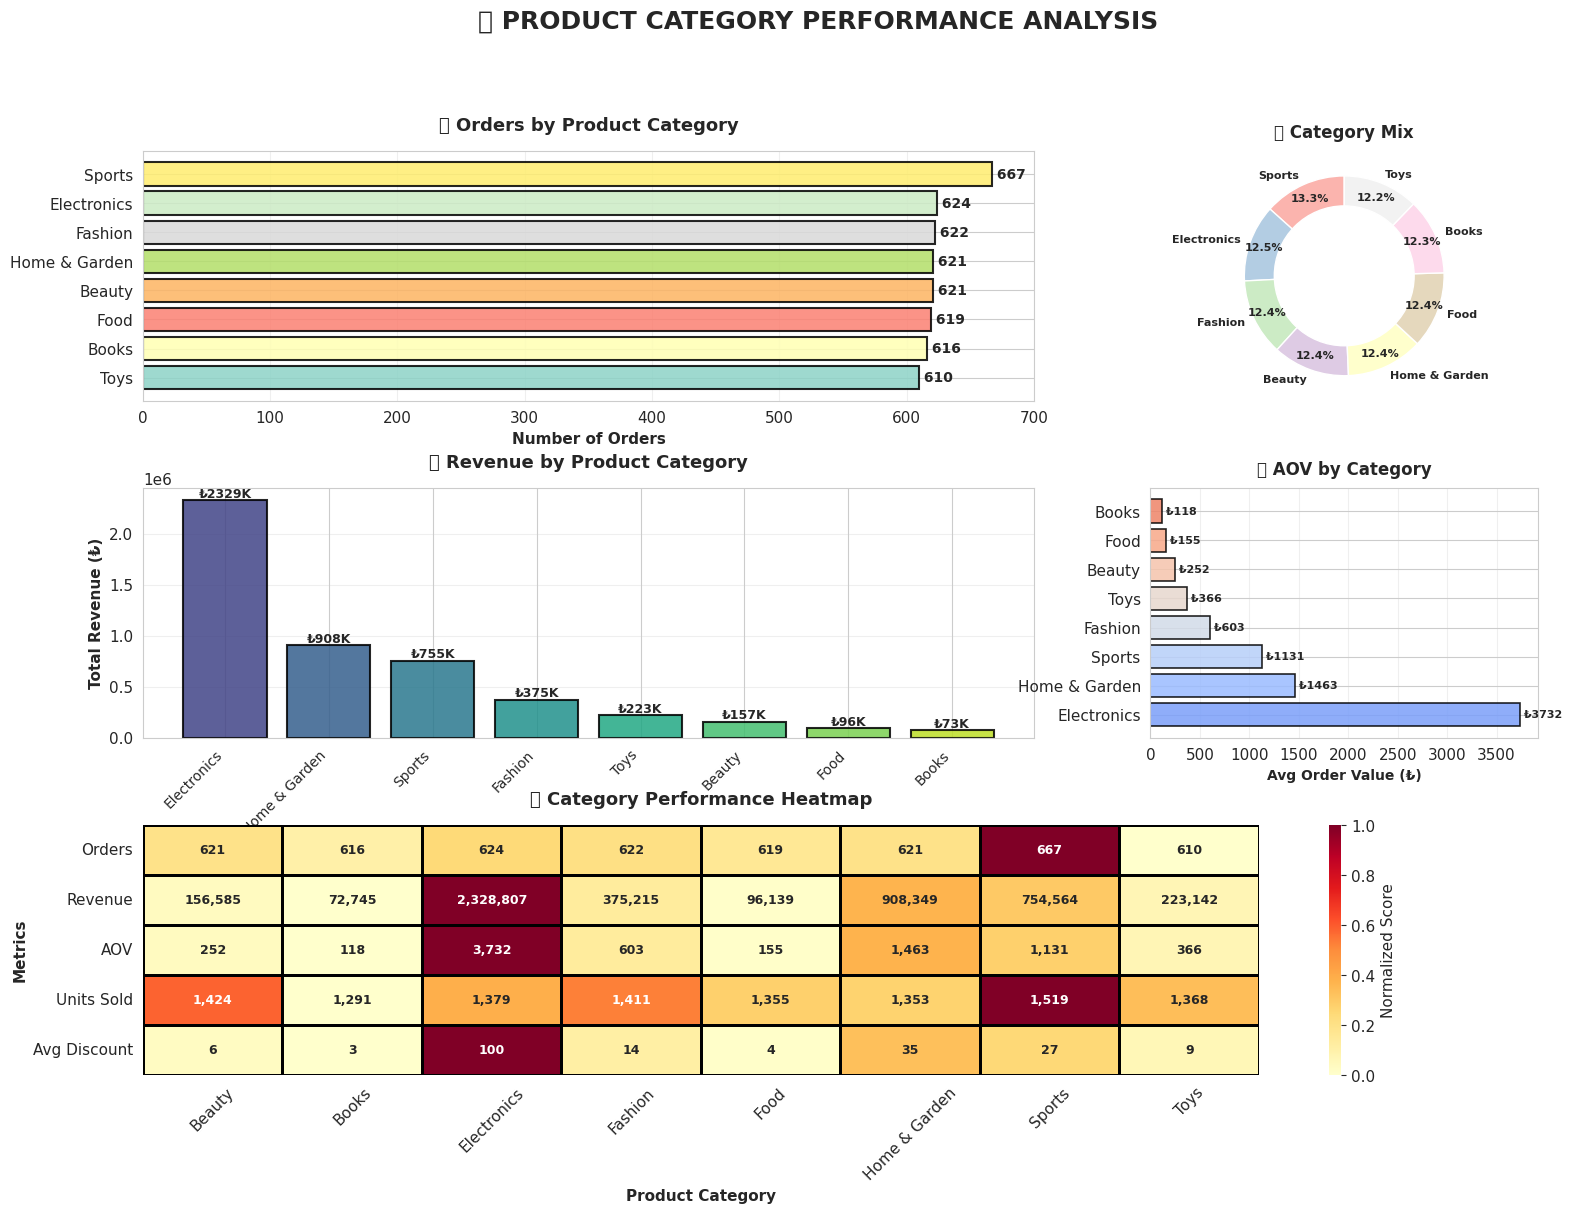


🏆 Category Champions:
   • Most orders: Sports (667 orders)
   • Highest revenue: Electronics (₺2,328,807)
   • Best AOV: Electronics (₺3732.06)


In [8]:
# Product category analysis
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# 1. Orders by Category
ax1 = fig.add_subplot(gs[0, :2])
category_orders = df['Product_Category'].value_counts().sort_values(ascending=True)
colors_cat = plt.cm.Set3(np.linspace(0, 1, len(category_orders)))
bars1 = ax1.barh(category_orders.index, category_orders.values, color=colors_cat,
                 edgecolor='black', linewidth=1.5, alpha=0.85)
ax1.set_xlabel('Number of Orders', fontsize=11, weight='bold')
ax1.set_title('📦 Orders by Product Category', fontsize=13, weight='bold', pad=15)
ax1.grid(axis='x', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars1, category_orders.values)):
    ax1.text(val, i, f' {val:,}', va='center', fontsize=10, weight='bold')

# 2. Category Distribution Donut
ax2 = fig.add_subplot(gs[0, 2])
category_dist = df['Product_Category'].value_counts()
colors_donut = plt.cm.Pastel1(np.linspace(0, 1, len(category_dist)))
wedges, texts, autotexts = ax2.pie(category_dist.values, labels=category_dist.index,
                                     autopct='%1.1f%%', startangle=90, colors=colors_donut,
                                     textprops={'fontsize': 8, 'weight': 'bold'},
                                     pctdistance=0.85)
circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(circle)
ax2.set_title('🥧 Category Mix', fontsize=12, weight='bold', pad=10)

# 3. Revenue by Category
ax3 = fig.add_subplot(gs[1, :2])
category_revenue = df.groupby('Product_Category')['Final_Amount'].sum().sort_values(ascending=False)
bars3 = ax3.bar(range(len(category_revenue)), category_revenue.values,
                color=plt.cm.viridis(np.linspace(0.2, 0.9, len(category_revenue))),
                edgecolor='black', linewidth=1.5, alpha=0.85)
ax3.set_xticks(range(len(category_revenue)))
ax3.set_xticklabels(category_revenue.index, rotation=45, ha='right', fontsize=10)
ax3.set_ylabel('Total Revenue (₺)', fontsize=11, weight='bold')
ax3.set_title('💰 Revenue by Product Category', fontsize=13, weight='bold', pad=15)
ax3.grid(axis='y', alpha=0.3)

for bar, val in zip(bars3, category_revenue.values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'₺{val/1000:.0f}K', ha='center', va='bottom', fontsize=9, weight='bold')

# 4. Average Order Value by Category
ax4 = fig.add_subplot(gs[1, 2])
category_aov = df.groupby('Product_Category')['Final_Amount'].mean().sort_values(ascending=False)
bars4 = ax4.barh(category_aov.index, category_aov.values,
                 color=plt.cm.coolwarm(np.linspace(0.2, 0.8, len(category_aov))),
                 edgecolor='black', linewidth=1.2, alpha=0.85)
ax4.set_xlabel('Avg Order Value (₺)', fontsize=10, weight='bold')
ax4.set_title('📊 AOV by Category', fontsize=12, weight='bold', pad=10)
ax4.grid(axis='x', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars4, category_aov.values)):
    ax4.text(val, i, f' ₺{val:.0f}', va='center', fontsize=8, weight='bold')

# 5. Category Performance Heatmap
ax5 = fig.add_subplot(gs[2, :])
category_metrics = df.groupby('Product_Category').agg({
    'Order_ID': 'count',
    'Final_Amount': ['sum', 'mean'],
    'Quantity': 'sum',
    'Discount_Amount': 'mean'
}).round(0)
category_metrics.columns = ['Orders', 'Revenue', 'AOV', 'Units Sold', 'Avg Discount']
category_metrics_normalized = (category_metrics - category_metrics.min()) / (category_metrics.max() - category_metrics.min())

sns.heatmap(category_metrics_normalized.T, annot=category_metrics.T, fmt=',.0f',
            cmap='YlOrRd', linewidths=1, linecolor='black', cbar_kws={'label': 'Normalized Score'},
            ax=ax5, annot_kws={'fontsize': 9, 'weight': 'bold'})
ax5.set_title('🔥 Category Performance Heatmap', fontsize=13, weight='bold', pad=15)
ax5.set_xlabel('Product Category', fontsize=11, weight='bold')
ax5.set_ylabel('Metrics', fontsize=11, weight='bold')
ax5.tick_params(axis='x', rotation=45)

plt.suptitle('🛍️ PRODUCT CATEGORY PERFORMANCE ANALYSIS', fontsize=18, weight='bold', y=0.998)
plt.show()

print("\n🏆 Category Champions:")
print(f"   • Most orders: {category_orders.index[-1]} ({category_orders.values[-1]:,} orders)")
print(f"   • Highest revenue: {category_revenue.index[0]} (₺{category_revenue.values[0]:,.0f})")
print(f"   • Best AOV: {category_aov.index[0]} (₺{category_aov.values[0]:.2f})")

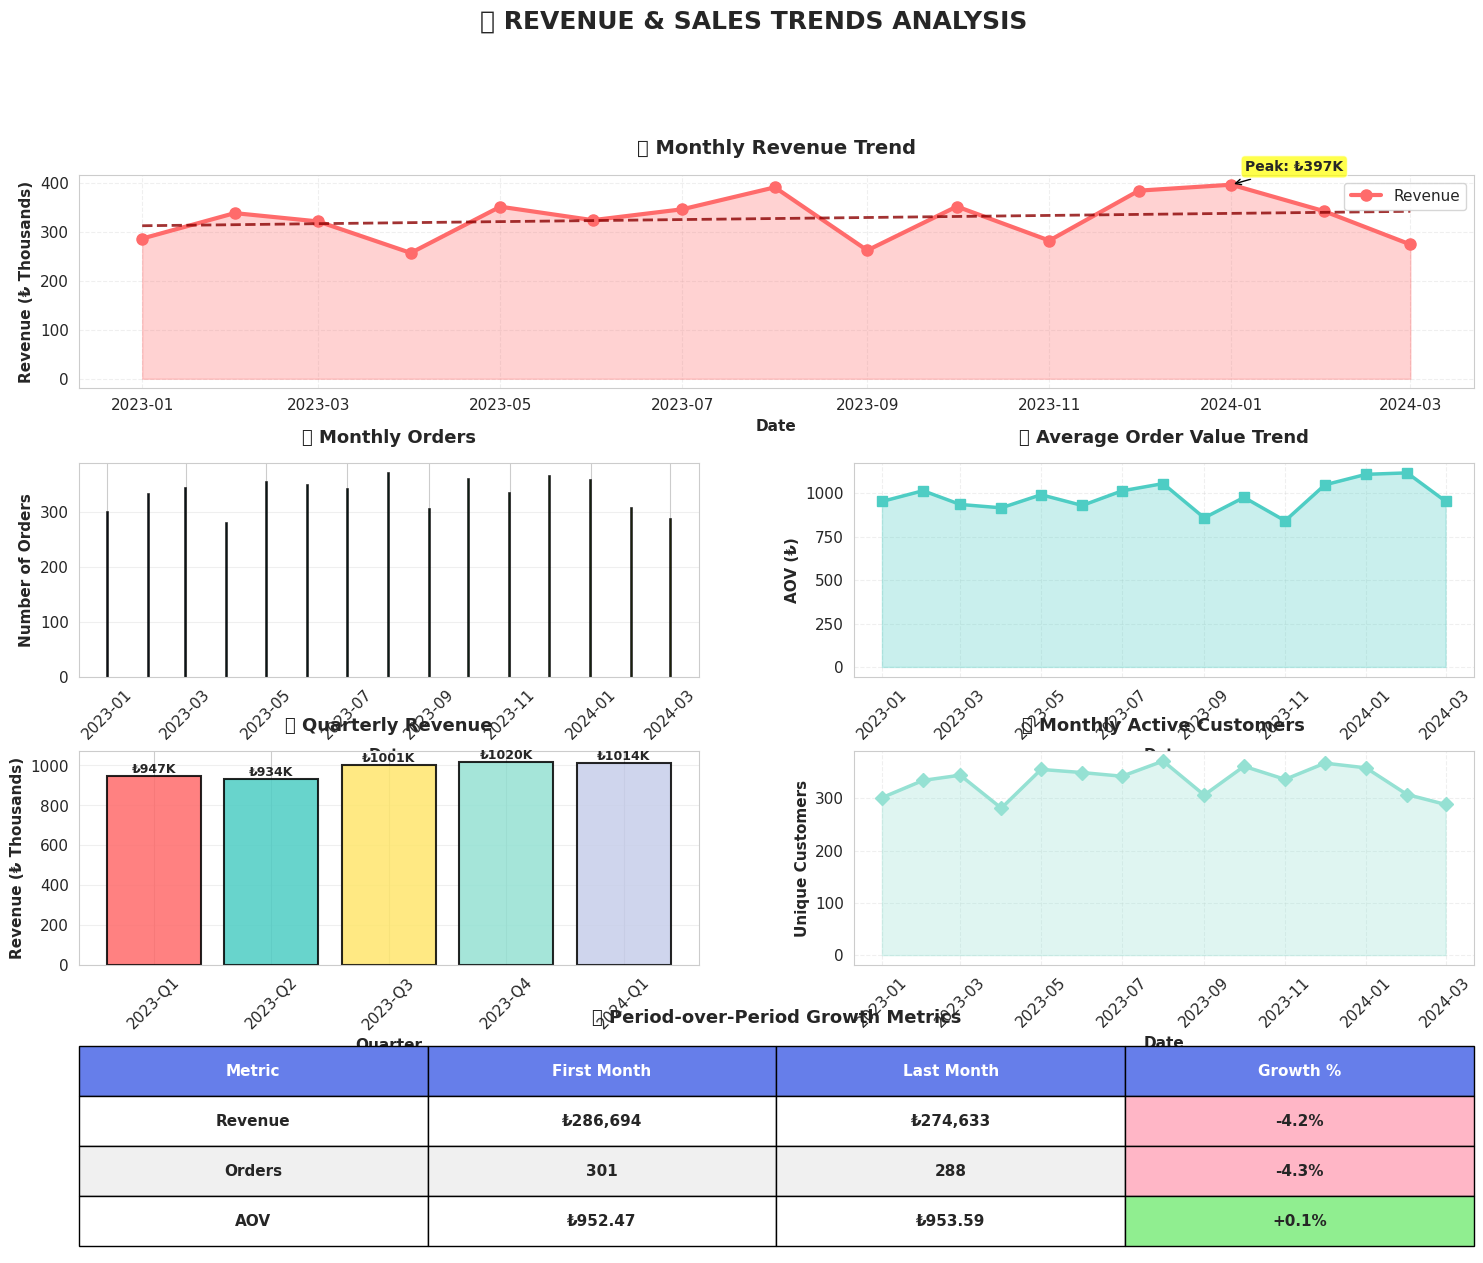

✅ Time series analysis complete!


In [9]:
# Time series analysis
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(4, 2, hspace=0.35, wspace=0.25)

# Prepare monthly data
monthly_data = df.groupby(df['Date'].dt.to_period('M')).agg({
    'Final_Amount': 'sum',
    'Order_ID': 'count',
    'Customer_ID': 'nunique',
    'Discount_Amount': 'sum'
}).reset_index()
monthly_data['Date'] = monthly_data['Date'].dt.to_timestamp()
monthly_data['AOV'] = monthly_data['Final_Amount'] / monthly_data['Order_ID']

# 1. Monthly Revenue Trend
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(monthly_data['Date'], monthly_data['Final_Amount']/1000,
         marker='o', linewidth=3, markersize=8, color='#FF6B6B', label='Revenue')
ax1.fill_between(monthly_data['Date'], monthly_data['Final_Amount']/1000,
                  alpha=0.3, color='#FF6B6B')
ax1.set_title('💰 Monthly Revenue Trend', fontsize=14, weight='bold', pad=15)
ax1.set_xlabel('Date', fontsize=11, weight='bold')
ax1.set_ylabel('Revenue (₺ Thousands)', fontsize=11, weight='bold')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.legend(fontsize=11)

# Add trend line
z = np.polyfit(range(len(monthly_data)), monthly_data['Final_Amount']/1000, 1)
p = np.poly1d(z)
ax1.plot(monthly_data['Date'], p(range(len(monthly_data))),
         "--", color='darkred', linewidth=2, alpha=0.8, label='Trend')

# Annotate max and min
max_idx = monthly_data['Final_Amount'].idxmax()
min_idx = monthly_data['Final_Amount'].idxmin()
ax1.annotate(f"Peak: ₺{monthly_data.loc[max_idx, 'Final_Amount']/1000:.0f}K",
             xy=(monthly_data.loc[max_idx, 'Date'], monthly_data.loc[max_idx, 'Final_Amount']/1000),
             xytext=(10, 10), textcoords='offset points', fontsize=10, weight='bold',
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
             arrowprops=dict(arrowstyle='->', color='black'))

# 2. Monthly Orders Trend
ax2 = fig.add_subplot(gs[1, 0])
ax2.bar(monthly_data['Date'], monthly_data['Order_ID'],
        color=plt.cm.viridis(np.linspace(0.3, 0.9, len(monthly_data))),
        edgecolor='black', linewidth=1.2, alpha=0.85)
ax2.set_title('📦 Monthly Orders', fontsize=13, weight='bold', pad=15)
ax2.set_xlabel('Date', fontsize=11, weight='bold')
ax2.set_ylabel('Number of Orders', fontsize=11, weight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# 3. Average Order Value Trend
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(monthly_data['Date'], monthly_data['AOV'],
         marker='s', linewidth=2.5, markersize=7, color='#4ECDC4')
ax3.fill_between(monthly_data['Date'], monthly_data['AOV'], alpha=0.3, color='#4ECDC4')
ax3.set_title('💵 Average Order Value Trend', fontsize=13, weight='bold', pad=15)
ax3.set_xlabel('Date', fontsize=11, weight='bold')
ax3.set_ylabel('AOV (₺)', fontsize=11, weight='bold')
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.tick_params(axis='x', rotation=45)

# 4. Quarterly Comparison
ax4 = fig.add_subplot(gs[2, 0])
quarterly_data = df.groupby(['Year', 'Quarter'])['Final_Amount'].sum().reset_index()
quarterly_data['Period'] = quarterly_data['Year'].astype(str) + '-Q' + quarterly_data['Quarter'].astype(str)
bars = ax4.bar(quarterly_data['Period'], quarterly_data['Final_Amount']/1000,
               color=['#FF6B6B', '#4ECDC4', '#FFE66D', '#95E1D3', '#C7CEEA'],
               edgecolor='black', linewidth=1.5, alpha=0.85)
ax4.set_title('📊 Quarterly Revenue', fontsize=13, weight='bold', pad=15)
ax4.set_xlabel('Quarter', fontsize=11, weight='bold')
ax4.set_ylabel('Revenue (₺ Thousands)', fontsize=11, weight='bold')
ax4.grid(axis='y', alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

for bar, val in zip(bars, quarterly_data['Final_Amount']/1000):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'₺{val:.0f}K', ha='center', va='bottom', fontsize=9, weight='bold')

# 5. Monthly Customer Growth
ax5 = fig.add_subplot(gs[2, 1])
ax5.plot(monthly_data['Date'], monthly_data['Customer_ID'],
         marker='D', linewidth=2.5, markersize=7, color='#95E1D3')
ax5.fill_between(monthly_data['Date'], monthly_data['Customer_ID'], alpha=0.3, color='#95E1D3')
ax5.set_title('👥 Monthly Active Customers', fontsize=13, weight='bold', pad=15)
ax5.set_xlabel('Date', fontsize=11, weight='bold')
ax5.set_ylabel('Unique Customers', fontsize=11, weight='bold')
ax5.grid(True, alpha=0.3, linestyle='--')
ax5.tick_params(axis='x', rotation=45)

# 6. Growth Metrics Table
ax6 = fig.add_subplot(gs[3, :])
ax6.axis('off')

# Calculate growth metrics
first_month_revenue = monthly_data['Final_Amount'].iloc[0]
last_month_revenue = monthly_data['Final_Amount'].iloc[-1]
revenue_growth = ((last_month_revenue - first_month_revenue) / first_month_revenue * 100)

first_month_orders = monthly_data['Order_ID'].iloc[0]
last_month_orders = monthly_data['Order_ID'].iloc[-1]
order_growth = ((last_month_orders - first_month_orders) / first_month_orders * 100)

metrics_data = [
    ['Metric', 'First Month', 'Last Month', 'Growth %'],
    ['Revenue', f'₺{first_month_revenue:,.0f}', f'₺{last_month_revenue:,.0f}', f'{revenue_growth:+.1f}%'],
    ['Orders', f'{first_month_orders:,}', f'{last_month_orders:,}', f'{order_growth:+.1f}%'],
    ['AOV', f'₺{monthly_data["AOV"].iloc[0]:.2f}', f'₺{monthly_data["AOV"].iloc[-1]:.2f}',
     f'{((monthly_data["AOV"].iloc[-1] - monthly_data["AOV"].iloc[0]) / monthly_data["AOV"].iloc[0] * 100):+.1f}%'],
]

table = ax6.table(cellText=metrics_data, cellLoc='center', loc='center',
                  colWidths=[0.25, 0.25, 0.25, 0.25])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 3)

# Style header row
for i in range(4):
    cell = table[(0, i)]
    cell.set_facecolor('#667eea')
    cell.set_text_props(weight='bold', color='white')

# Style data rows
for i in range(1, 4):
    for j in range(4):
        cell = table[(i, j)]
        if j == 3:  # Growth column
            value = float(metrics_data[i][3].replace('%', '').replace('+', ''))
            if value > 0:
                cell.set_facecolor('#90EE90')
            elif value < 0:
                cell.set_facecolor('#FFB6C6')
            else:
                cell.set_facecolor('#FFFACD')
        else:
            cell.set_facecolor('#F0F0F0' if i % 2 == 0 else 'white')
        cell.set_text_props(weight='bold')

ax6.set_title('📊 Period-over-Period Growth Metrics', fontsize=13, weight='bold', pad=20, y=0.95)

plt.suptitle('📈 REVENUE & SALES TRENDS ANALYSIS', fontsize=18, weight='bold', y=0.998)
plt.show()

print("✅ Time series analysis complete!")

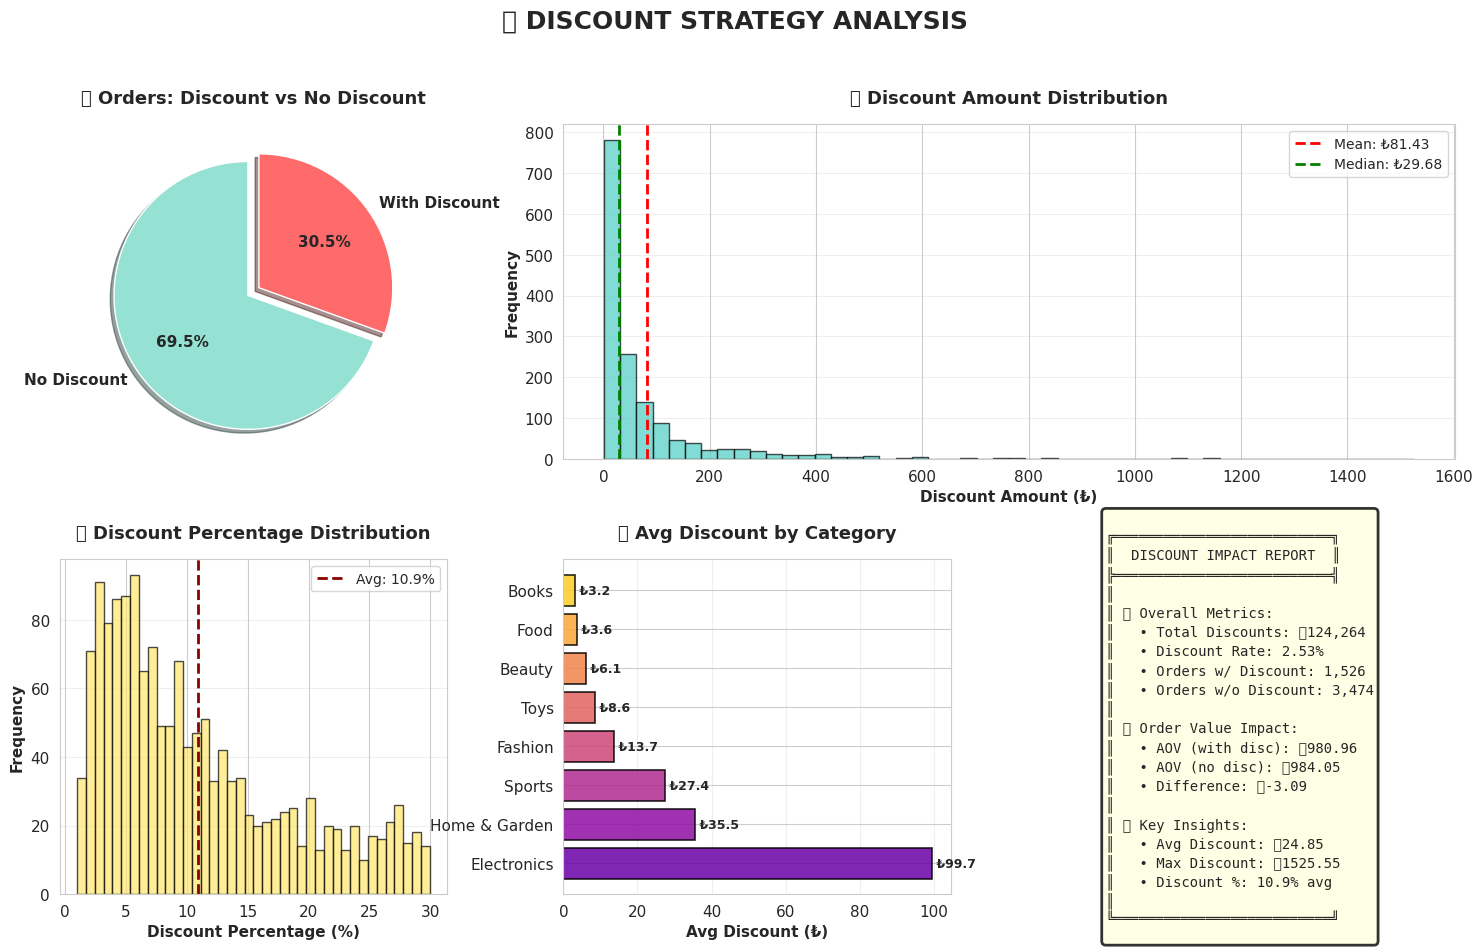

✅ Discount analysis complete!


In [10]:
# Discount analysis
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1. Discount vs No Discount
ax1 = fig.add_subplot(gs[0, 0])
discount_split = df['Has_Discount'].value_counts()
colors_discount = ['#95E1D3', '#FF6B6B']
explode = (0.05, 0.05)
wedges, texts, autotexts = ax1.pie(discount_split.values, labels=['No Discount', 'With Discount'],
                                     autopct='%1.1f%%', startangle=90, colors=colors_discount,
                                     explode=explode, textprops={'fontsize': 11, 'weight': 'bold'},
                                     shadow=True)
ax1.set_title('🎁 Orders: Discount vs No Discount', fontsize=13, weight='bold', pad=15)

# 2. Discount Amount Distribution
ax2 = fig.add_subplot(gs[0, 1:])
discount_data = df[df['Discount_Amount'] > 0]['Discount_Amount']
ax2.hist(discount_data, bins=50, color='#4ECDC4', edgecolor='black', alpha=0.7)
ax2.axvline(discount_data.mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: ₺{discount_data.mean():.2f}')
ax2.axvline(discount_data.median(), color='green', linestyle='--', linewidth=2,
            label=f'Median: ₺{discount_data.median():.2f}')
ax2.set_title('💰 Discount Amount Distribution', fontsize=13, weight='bold', pad=15)
ax2.set_xlabel('Discount Amount (₺)', fontsize=11, weight='bold')
ax2.set_ylabel('Frequency', fontsize=11, weight='bold')
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3)

# 3. Discount Percentage Distribution
ax3 = fig.add_subplot(gs[1, 0])
discount_pct_data = df[df['Discount_Percentage'] > 0]['Discount_Percentage']
ax3.hist(discount_pct_data, bins=40, color='#FFE66D', edgecolor='black', alpha=0.7)
ax3.axvline(discount_pct_data.mean(), color='darkred', linestyle='--', linewidth=2,
            label=f'Avg: {discount_pct_data.mean():.1f}%')
ax3.set_title('📊 Discount Percentage Distribution', fontsize=13, weight='bold', pad=15)
ax3.set_xlabel('Discount Percentage (%)', fontsize=11, weight='bold')
ax3.set_ylabel('Frequency', fontsize=11, weight='bold')
ax3.legend(fontsize=10)
ax3.grid(axis='y', alpha=0.3)

# 4. Discount by Category
ax4 = fig.add_subplot(gs[1, 1])
category_discount = df.groupby('Product_Category').agg({
    'Discount_Amount': 'mean',
    'Has_Discount': 'mean'
}).sort_values('Discount_Amount', ascending=False)

bars = ax4.barh(category_discount.index, category_discount['Discount_Amount'],
                color=plt.cm.plasma(np.linspace(0.2, 0.9, len(category_discount))),
                edgecolor='black', linewidth=1.2, alpha=0.85)
ax4.set_xlabel('Avg Discount (₺)', fontsize=11, weight='bold')
ax4.set_title('🏷️ Avg Discount by Category', fontsize=13, weight='bold', pad=15)
ax4.grid(axis='x', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars, category_discount['Discount_Amount'])):
    ax4.text(val, i, f' ₺{val:.1f}', va='center', fontsize=9, weight='bold')

# 5. Impact Analysis
ax5 = fig.add_subplot(gs[1, 2])
ax5.axis('off')

# Calculate metrics
orders_with_discount = df[df['Has_Discount'] == 1]
orders_without_discount = df[df['Has_Discount'] == 0]

avg_order_with_discount = orders_with_discount['Final_Amount'].mean()
avg_order_without_discount = orders_without_discount['Final_Amount'].mean()

total_revenue = df['Final_Amount'].sum()
total_discounts = df['Discount_Amount'].sum()
discount_rate = (total_discounts / total_revenue * 100)

impact_text = f"""
╔══════════════════════════╗
║  DISCOUNT IMPACT REPORT  ║
╠══════════════════════════╣
║
║ 📊 Overall Metrics:
║   • Total Discounts: ₺{total_discounts:,.0f}
║   • Discount Rate: {discount_rate:.2f}%
║   • Orders w/ Discount: {len(orders_with_discount):,}
║   • Orders w/o Discount: {len(orders_without_discount):,}
║
║ 💰 Order Value Impact:
║   • AOV (with disc): ₺{avg_order_with_discount:.2f}
║   • AOV (no disc): ₺{avg_order_without_discount:.2f}
║   • Difference: ₺{avg_order_with_discount - avg_order_without_discount:.2f}
║
║ 🎯 Key Insights:
║   • Avg Discount: ₺{df['Discount_Amount'].mean():.2f}
║   • Max Discount: ₺{df['Discount_Amount'].max():.2f}
║   • Discount %: {discount_pct_data.mean():.1f}% avg
║
╚══════════════════════════╝
"""

ax5.text(0.1, 0.5, impact_text, fontsize=10, family='monospace',
         verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8, edgecolor='black', linewidth=2))

plt.suptitle('🎁 DISCOUNT STRATEGY ANALYSIS', fontsize=18, weight='bold', y=0.995)
plt.show()

print("✅ Discount analysis complete!")

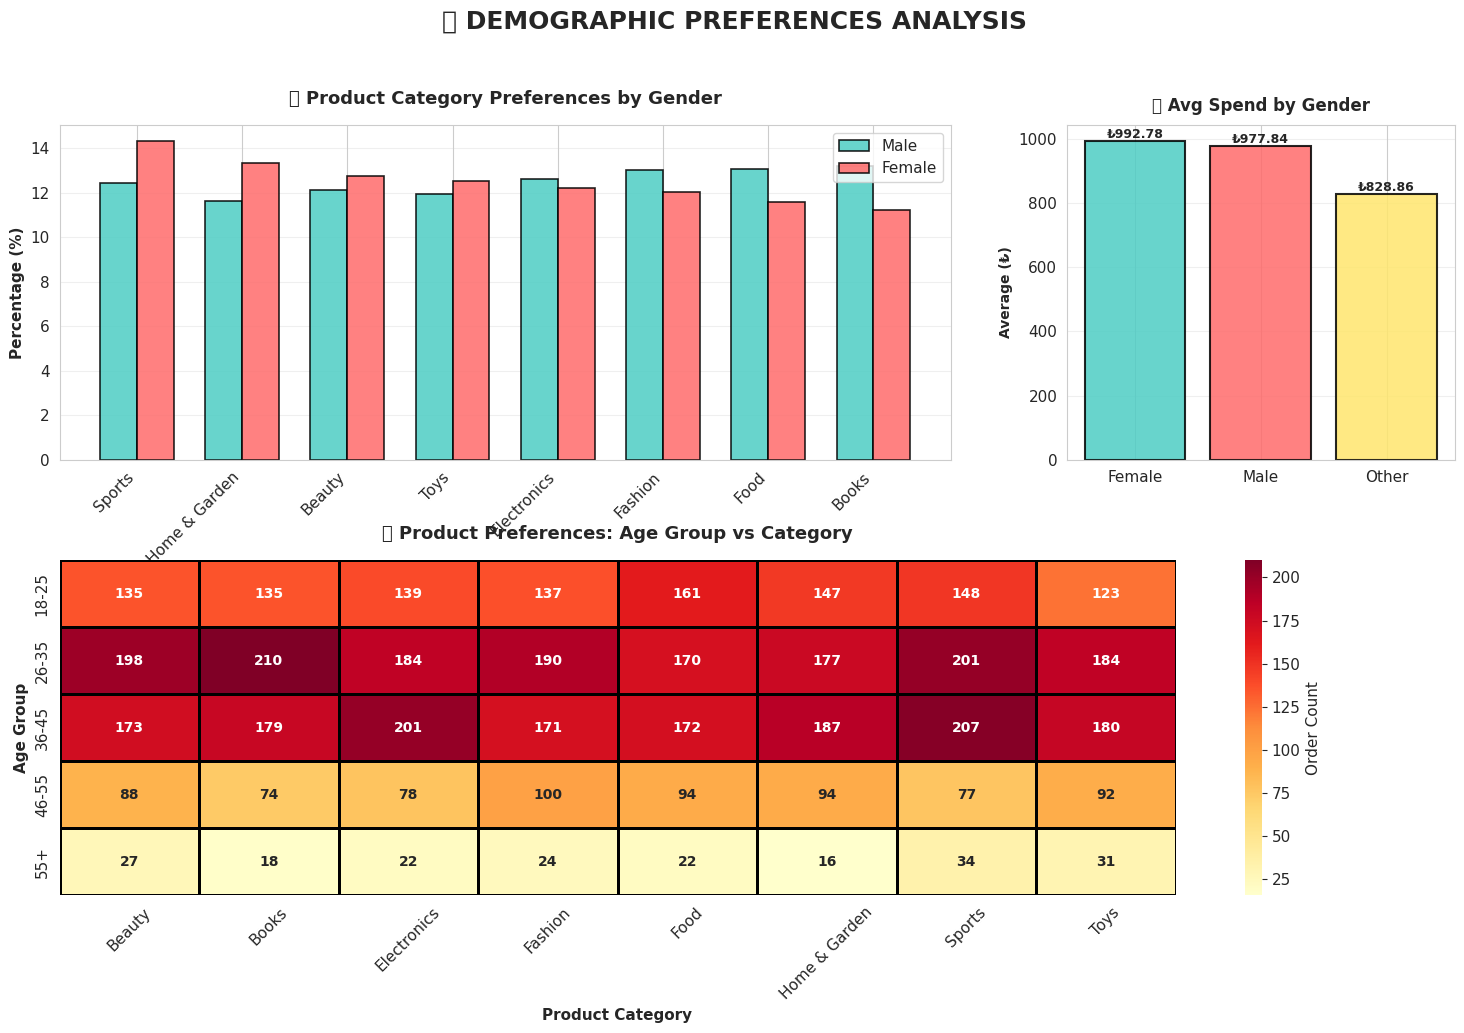


🎯 Key Demographic Insights:

Top Category by Gender:
   • Male: Books
   • Female: Sports

Top Category by Age Group:
   • 18-25: Food (161 orders)
   • 26-35: Books (210 orders)
   • 36-45: Sports (207 orders)
   • 46-55: Fashion (100 orders)
   • 55+: Sports (34 orders)


In [11]:
# Gender and age analysis
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1. Category Preferences by Gender
ax1 = fig.add_subplot(gs[0, :2])
gender_category = pd.crosstab(df['Product_Category'], df['Gender'], normalize='columns') * 100
gender_category_plot = gender_category[['Male', 'Female']].sort_values('Female', ascending=False)

x = np.arange(len(gender_category_plot))
width = 0.35

bars1 = ax1.bar(x - width/2, gender_category_plot['Male'], width, label='Male',
                color='#4ECDC4', edgecolor='black', linewidth=1.2, alpha=0.85)
bars2 = ax1.bar(x + width/2, gender_category_plot['Female'], width, label='Female',
                color='#FF6B6B', edgecolor='black', linewidth=1.2, alpha=0.85)

ax1.set_title('🎯 Product Category Preferences by Gender', fontsize=13, weight='bold', pad=15)
ax1.set_xlabel('Product Category', fontsize=11, weight='bold')
ax1.set_ylabel('Percentage (%)', fontsize=11, weight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(gender_category_plot.index, rotation=45, ha='right')
ax1.legend(fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# 2. Spending by Gender
ax2 = fig.add_subplot(gs[0, 2])
gender_spending = df.groupby('Gender').agg({
    'Final_Amount': ['sum', 'mean'],
    'Order_ID': 'count'
})
gender_spending.columns = ['Total', 'Average', 'Orders']

colors_gender = ['#4ECDC4', '#FF6B6B', '#FFE66D']
bars = ax2.bar(gender_spending.index, gender_spending['Average'],
               color=colors_gender, edgecolor='black', linewidth=1.5, alpha=0.85)
ax2.set_title('💰 Avg Spend by Gender', fontsize=12, weight='bold', pad=10)
ax2.set_ylabel('Average (₺)', fontsize=10, weight='bold')
ax2.grid(axis='y', alpha=0.3)

for bar, val in zip(bars, gender_spending['Average']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'₺{val:.2f}', ha='center', va='bottom', fontsize=9, weight='bold')

# 3. Age Group vs Category Heatmap
ax3 = fig.add_subplot(gs[1, :])
age_category = pd.crosstab(df['Age_Group'], df['Product_Category'])
sns.heatmap(age_category, annot=True, fmt='d', cmap='YlOrRd',
            linewidths=1, linecolor='black', cbar_kws={'label': 'Order Count'},
            ax=ax3, annot_kws={'fontsize': 10, 'weight': 'bold'})
ax3.set_title('🔥 Product Preferences: Age Group vs Category', fontsize=13, weight='bold', pad=15)
ax3.set_xlabel('Product Category', fontsize=11, weight='bold')
ax3.set_ylabel('Age Group', fontsize=11, weight='bold')
ax3.tick_params(axis='x', rotation=45)

plt.suptitle('👥 DEMOGRAPHIC PREFERENCES ANALYSIS', fontsize=18, weight='bold', y=0.995)
plt.show()

# Additional insights
print("\n🎯 Key Demographic Insights:")
print("\nTop Category by Gender:")
for gender in ['Male', 'Female']:
    top_cat = df[df['Gender'] == gender]['Product_Category'].value_counts().index[0]
    print(f"   • {gender}: {top_cat}")

print("\nTop Category by Age Group:")
for age_group in df['Age_Group'].cat.categories:
    top_cat = df[df['Age_Group'] == age_group]['Product_Category'].value_counts().index[0]
    count = df[df['Age_Group'] == age_group]['Product_Category'].value_counts().values[0]
    print(f"   • {age_group}: {top_cat} ({count} orders)")


/tmp/ipython-input-2236922212.py:13: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


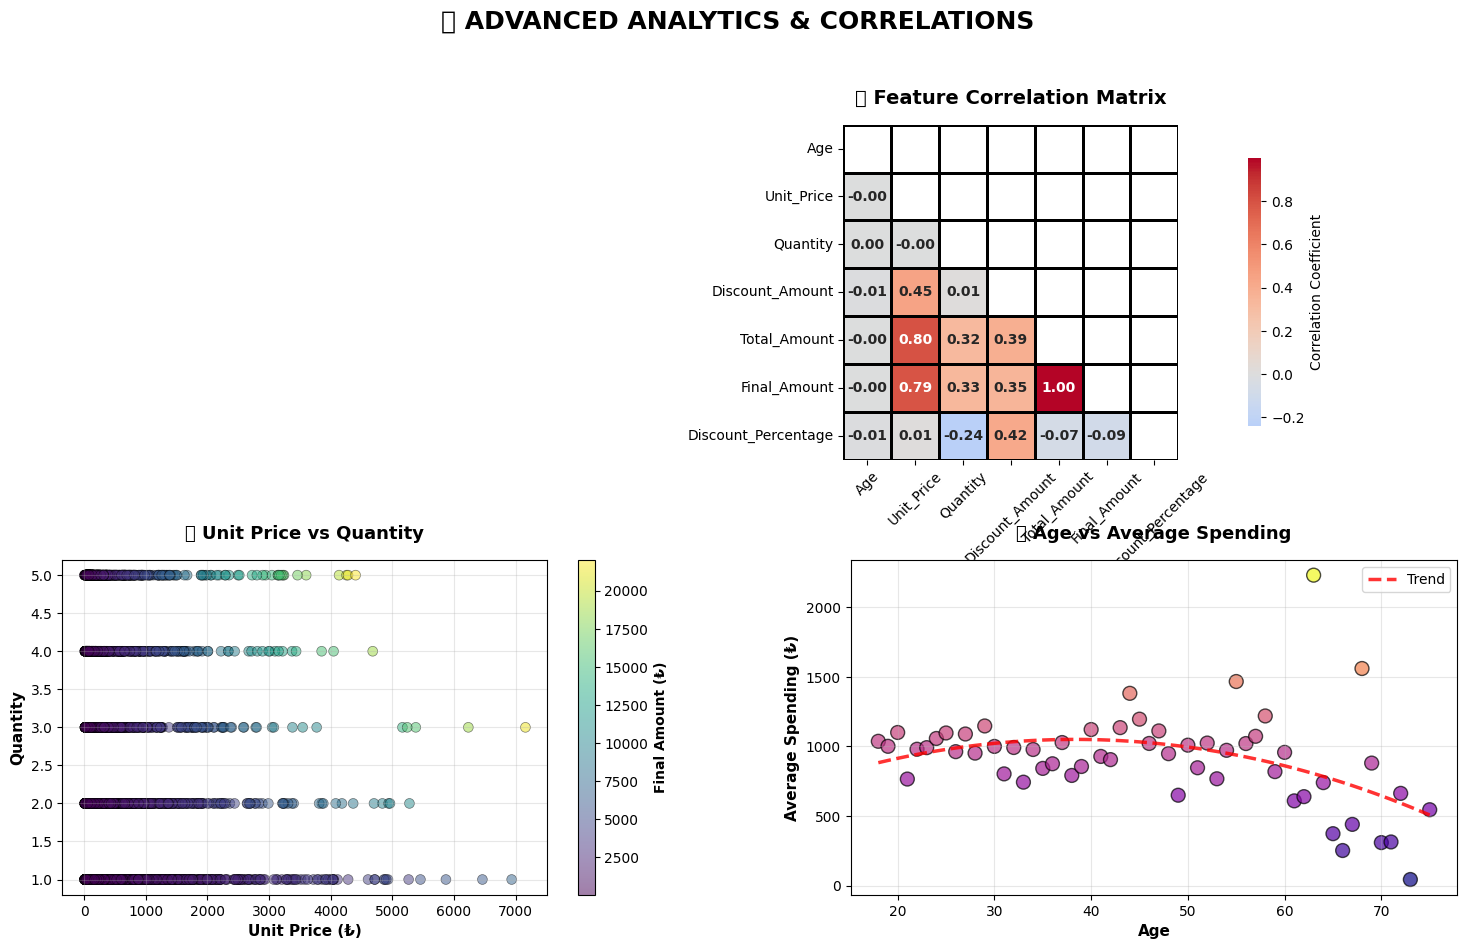


📊 Key Correlations:

Top 5 Strongest Correlations:
   • Total_Amount ↔ Final_Amount: 0.999
   • Unit_Price ↔ Total_Amount: 0.798
   • Unit_Price ↔ Final_Amount: 0.791
   • Unit_Price ↔ Discount_Amount: 0.450
   • Discount_Amount ↔ Discount_Percentage: 0.417


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Define the dataset handle and file path (as established in previous working cells)
dataset_handle = "umuttuygurr/e-commerce-customer-behavior-and-sales-analysis-tr"
file_path = "ecommerce_customer_behavior_dataset.csv"

# Load the dataset using kagglehub to ensure df is defined
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  dataset_handle,
  file_path,
)

# Perform feature engineering (as established in previous working cells)
df['Date'] = pd.to_datetime(df['Date'])
df['Total_Amount'] = df['Unit_Price'] * df['Quantity']
df['Final_Amount'] = df['Total_Amount'] - df['Discount_Amount']
df['Discount_Percentage'] = (df['Discount_Amount'] / df['Total_Amount'] * 100).fillna(0)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Day_Name'] = df['Date'].dt.day_name()
df['Quarter'] = df['Date'].dt.quarter
df['Week'] = df['Date'].dt.isocalendar().week
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100],
                          labels=['18-25', '26-35', '36-45', '46-55', '55+'])
df['Has_Discount'] = (df['Discount_Amount'] > 0).astype(int)

# Advanced analytics
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# 1. Correlation Heatmap
ax1 = fig.add_subplot(gs[0, :])
numerical_cols = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount',
                  'Total_Amount', 'Final_Amount', 'Discount_Percentage']
correlation = df[numerical_cols].corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=2, linecolor='black',
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            ax=ax1, annot_kws={'fontsize': 10, 'weight': 'bold'})
ax1.set_title('🔗 Feature Correlation Matrix', fontsize=14, weight='bold', pad=15)
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', rotation=0)

# 2. Price vs Quantity
ax2 = fig.add_subplot(gs[1, 0])
scatter1 = ax2.scatter(df['Unit_Price'], df['Quantity'],
                       c=df['Final_Amount'], cmap='viridis',
                       s=50, alpha=0.5, edgecolors='black', linewidth=0.5)
ax2.set_title('💰 Unit Price vs Quantity', fontsize=13, weight='bold', pad=15)
ax2.set_xlabel('Unit Price (₺)', fontsize=11, weight='bold')
ax2.set_ylabel('Quantity', fontsize=11, weight='bold')
ax2.grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=ax2)
cbar1.set_label('Final Amount (₺)', fontsize=10, weight='bold')

# 3. Age vs Spending
ax3 = fig.add_subplot(gs[1, 1])
age_spending = df.groupby('Age')['Final_Amount'].mean().reset_index()
ax3.scatter(age_spending['Age'], age_spending['Final_Amount'],
            c=age_spending['Final_Amount'], cmap='plasma',
            s=100, alpha=0.7, edgecolors='black', linewidth=1)
z = np.polyfit(age_spending['Age'], age_spending['Final_Amount'], 2)
p = np.poly1d(z)
ax3.plot(age_spending['Age'], p(age_spending['Age']),
         "--", color='red', linewidth=2.5, alpha=0.8, label='Trend')
ax3.set_title('👤 Age vs Average Spending', fontsize=13, weight='bold', pad=15)
ax3.set_xlabel('Age', fontsize=11, weight='bold')
ax3.set_ylabel('Average Spending (₺)', fontsize=11, weight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

plt.suptitle('🔬 ADVANCED ANALYTICS & CORRELATIONS', fontsize=18, weight='bold', y=0.995)
plt.show()

print("\n📊 Key Correlations:")
print("="*50)
# Find strongest correlations
corr_pairs = []
for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):
        corr_pairs.append({
            'Feature 1': correlation.columns[i],
            'Feature 2': correlation.columns[j],
            'Correlation': correlation.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs).sort_values('Correlation', key=abs, ascending=False)
print("\nTop 5 Strongest Correlations:")
for idx, row in corr_df.head(5).iterrows():
    print(f"   • {row['Feature 1']} ↔ {row['Feature 2']}: {row['Correlation']:.3f}")